In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [52]:
# Function to generate data
def generate_data(n_points, a, x_range=(-5, 5), noise=0.1, imbalance=True):
    X = np.random.uniform(x_range[0], x_range[1], n_points)
    Y = np.random.uniform(x_range[0], x_range[1], n_points)
    
    boundary = a * X**2 + X
    labels = (Y > boundary).astype(int)

    if imbalance:
        # Only keep more points from class 0
        mask = labels == 0
        keep = np.random.rand(n_points) < 0.5
        mask |= keep
        X, Y, labels = X[mask], Y[mask], labels[mask]

    data = np.column_stack((X, Y))
    return data, labels

In [32]:
# Function to visualize the data
def plot_data(data, labels, a):
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', alpha=0.6)
    x = np.linspace(-5, 5, 300)
    plt.plot(x, a * x**2 + x, 'k--', label=f'y = {a}x^2 + x')
    plt.title('Data with Non-linear Boundary')
    plt.xlabel('x'); plt.ylabel('y'); plt.legend()
    plt.grid(True)
    plt.show()

In [33]:
# Function to evaluate models
def evaluate_models(data, labels, nn_size=(10,)):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    acc_logreg = accuracy_score(y_test, logreg.predict(X_test))

    nn = MLPClassifier(hidden_layer_sizes=nn_size, max_iter=1000, random_state=42)
    nn.fit(X_train, y_train)
    acc_nn = accuracy_score(y_test, nn.predict(X_test))

    print(f"Logistic Regression Accuracy: {acc_logreg:.2f}")
    print(f"Neural Network {nn_size} Accuracy: {acc_nn:.2f}")


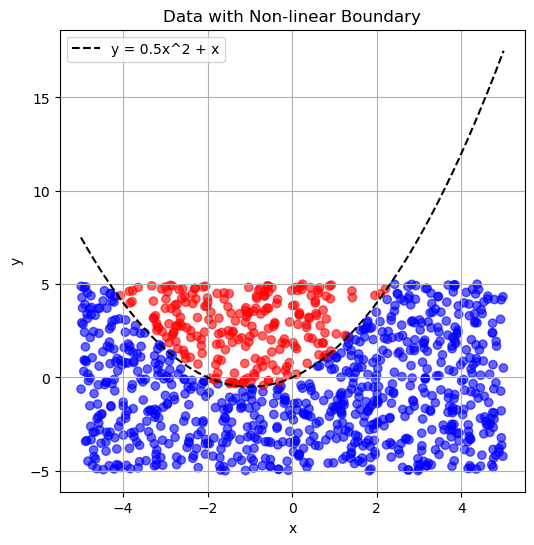

Logistic Regression Accuracy: 0.84
Neural Network (10,) Accuracy: 0.99


In [53]:
a = 0.5
n_points = 1000
data, labels = generate_data(n_points=n_points, a=a, imbalance=False)
plot_data(data, labels, a)
evaluate_models(data, labels, nn_size=(10,))
